In [211]:
import pandas as pd
import nltk
from nltk.corpus import words
#nltk.download('words')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests
import json
import matplotlib.pyplot as plt

In [214]:
df_words = pd.read_csv("sweet_anita280123MostCommonWords.csv")
df_sent = pd.read_csv("sweet_anita280123Clean.csv")

In [215]:
# english words
word_list = words.words()
# get words that are not in common english words
unique_words = [word for word in df_words["index"].values if word not in word_list]

In [216]:
len(unique_words)

1231

In [217]:
df_words['index'].nunique()

1921

In [218]:
# get emotes 
emotes = []

for page in range(1, 500):  
    url = f'https://api.frankerfacez.com/v1/emoticons?limit=50&page={page}'
    response = requests.get(url)
    data = json.loads(response.text)
    emotes.extend(data['emoticons'])

In [219]:
emotes_list=[]
for e in emotes:
    emotes_list.append(e["name"])
len(emotes_list)

24950

In [220]:
# fetch emotes from unique words
common_words = [word for word in emotes_list if word.lower() in unique_words]

print(set(common_words))

{'KEKW', 'monkaLaugh', 'WeirdChamp', 'Awww', 'LOL', 'FeelsStrongMan', 'Pepog', 'Copium', 'omE', 'SANIC', 'Kekw', 'HOPIUM', 'Weirdchamp', 'IDK', 'Gigachad', 'Hopium', 'widepeepoSad', 'COPIUM', 'Madg', 'Sanic', 'ppL', 'Pogg', 'GIGACHAD', 'Comfi', 'OkayChamp', 'Sadeg', 'HYPE', 'FeelsAmazingMan', 'COPium', 'pepoG', 'GigaChad', 'pepeLaugh', 'Shirley', 'Yess', 'OOOO', 'PepoG', 'POG', 'KOK', 'NOOOO', '4Head', 'gachiGASM', 'Noooo', 'Hype', 'DankG', 'Strongge', 'LoL', 'LMAO', 'pOG', 'Pog', 'Hohoho', 'Ayo', 'dankG', 'Strongi', 'PogG', 'pagMan', 'PagMan', '4HEad', 'Ahhh', 'AYO', 'PepeLaugh', 'monkaHmm', 'Ooooh', 'AYA', 'CatJAM', 'catJam', 'GRUG', 'FRICK', 'VIBE', 'DonkSass'}


In [221]:
analyser = SentimentIntensityAnalyzer()

Added new_emotes to the Lexicon, these are emotes that are unique to only Twitch and its 3rd party

In [222]:
new_emotes = {'kekw' : 4.0, 
              'monkalaugh' : 0.0, 
              'weirdchamp' : -3.0,
              'awww' : 4.0,
              'lol' : 4.4,
              'feelsstrongman' : -4.0, 
              'pepog' :  0.0,
              'copium' : -3.0,
              'ome' : 2.0, 
              'sanic' : 1.0,
              'hopium' : -1.0,
              'idk' : 0.0,
              'gigachad' : 3.0,
              'widepeeposad' : -1.0,
              'madg' : -2.0,
              'ppl' : 0.0,
              'pogg' : 2.0,
              'comfi' : 0.0,
              'okaychamp' : -2.0,
              'hype' : 2.0,
              'feelsamazingman' : 3.0,
              'pepelaugh' : 2.0,
              'shirley' : 0.0,
              'yess' : 2.0,
              'pog' : 2.0,
              'kok' : 1.0,
              'noooo' : -2.0,
              '4head' : 0.0,
              'gachigasm' : 2.0,
              'strongge' : -1.0,
              'lmao' : 2.0,
              'hohoho' : 2.0,
              'ayo' : 0.0,
              'pagman' : -3.0,
              'monkahmm' : 0.0,
              'catjam' : 4.0,
              'grug' : -3.0,
              'frick' : -2.0,
              'vibe' : 1.0,
              'donksass' : -1.0
}

In [223]:
analyser.lexicon.update(new_emotes)

Polarity scores compute

In [224]:
df_sent.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message
0,2023-01-29 01:29:59,sweet_anita,wadafax,"and at the same time we now have technology that reinforces current power structures, like surveillance",0,like
1,2023-01-29 01:30:00,sweet_anita,iduhknowwhattoput,do you ever appreciate how smart you are,0,smart
2,2023-01-29 01:30:05,sweet_anita,juiceconnoisseur,YEP kok,0,yep
3,2023-01-29 01:30:10,sweet_anita,sohnnyjilverhand,"yeah it's not the de-facto cause, but it's perhaps a good sign to look out for NODDERS",0,yeah good
4,2023-01-29 01:30:13,sweet_anita,antman64bit,YEP,0,yep


In [225]:
df_sent['scores'] = df_sent['Message'].apply(lambda x:analyser.polarity_scores(x))

In [227]:
pd.set_option('display.max_colwidth', 200)
df_sent.tail(2)

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,scores
491,2023-01-29 01:58:35,sweet_anita,mabu_jpg,Jamgi :honeybee:,0,honeybee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
492,2023-01-29 01:59:56,sweet_anita,iduhknowwhattoput,"i think most people don't want to work , so when they are locked in they have commitment and it give them motivation",0,want commit,"{'neg': 0.056, 'neu': 0.755, 'pos': 0.189, 'compound': 0.5445}"


Calculate the total sentiment polarity scores split between Negative, Neutral, and Positive.

In [230]:
total=analyser.polarity_scores(df_sent['Cleanest_message'])
total

{'neg': 0.135, 'neu': 0.596, 'pos': 0.269, 'compound': 0.9707}

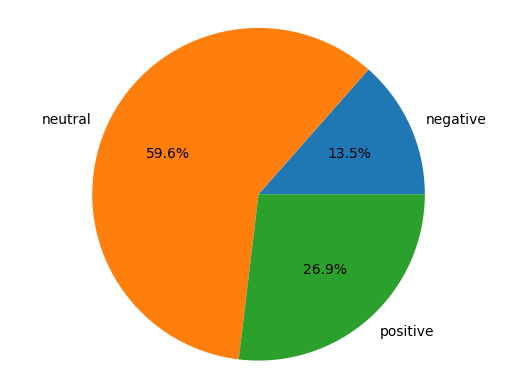

In [231]:
labels = ['negative', 'neutral', 'positive']
sizes  = [total['neg'], total['neu'], total['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()